## K-Means Clustering 

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn import cluster

warnings.filterwarnings('ignore')

filename = 'imdb_dataset.csv'
og = pd.read_csv(filename, header='infer')

df = pd.concat([og['title'], og['thtr_rel_year']], axis=1)
movies = df.replace('?',np.NaN)

print('Number of instances = %d' % (movies.shape[0]))
print('Number of attributes = %d' % (movies.shape[1]))

print('Number of missing values:')
for col in movies.columns:
    print('\t%s: %d' % (col,movies[col].isna().sum()))

Number of instances = 651
Number of attributes = 2
Number of missing values:
	title: 0
	thtr_rel_year: 0


In [2]:
data = movies.drop('title',axis=1)
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
show = pd.DataFrame(labels, index=movies.title, columns=['Cluster ID',])
show[0:7]

,Cluster ID
title,
Filly Brown,1
The Dish,1
Waiting for Guffman,0
The Age of Innocence,0
Malevolence,1
Old Partner,1
Lady Jane,2


In [3]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,thtr_rel_year
0,1994.373786
1,2007.216981
2,1980.503937


Text(0, 0.5, 'SSE')

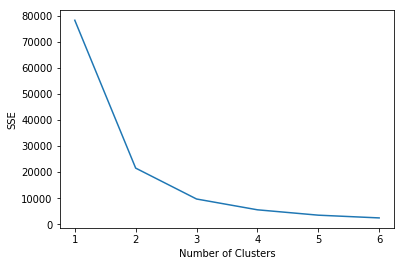

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Clustering

In [5]:
c1 = og['title']
c2 = og['best_pic_nom']
c3 = og['best_pic_win']
c4 = og['best_actor_win']
c5 = og['best_actress_win']
c6 = og['best_dir_win']
c7 = og['top200_box']
c8 = og['genre']
df = pd.concat([c1,c2,c3,c4,c5,c6,c7,c8], axis=1)
df.rename(columns={'genre':'class'}, inplace=True)
df = df.replace('?',np.NaN)

In [6]:
from sklearn import preprocessing
# yes=1, no=0
le = preprocessing.LabelEncoder()
df['best_pic_nom'] = le.fit_transform(df['best_pic_nom'])
df['best_pic_win'] = le.fit_transform(df['best_pic_win'])
df['best_actor_win'] = le.fit_transform(df['best_actor_win'])
df['best_actress_win'] = le.fit_transform(df['best_actress_win'])
df['best_dir_win'] = le.fit_transform(df['best_dir_win'])
df['top200_box'] = le.fit_transform(df['top200_box'])
# drop all 0 rows
indexNames = df[ (df['best_pic_nom'] == 0) & 
                 (df['best_pic_win'] == 0) &
                 (df['best_actor_win'] == 0) &
                 (df['best_actress_win'] == 0) &
                 (df['best_dir_win'] == 0) &
                 (df['top200_box'] == 0) ].index
df.drop(indexNames , inplace=True)
df.reset_index(inplace=True, drop=True)
df[0:5]

,title,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,class
0,The Age of Innocence,0,0,1,0,1,0,Drama
1,Mad Dog Time,0,0,1,0,0,0,Drama
2,Superman II,0,0,1,0,0,1,Action & Adventure
3,The Royal Tenenbaums,0,0,1,1,0,0,Comedy
4,Burn After Reading,0,0,0,1,1,0,Drama


### Single Link (MIN) 

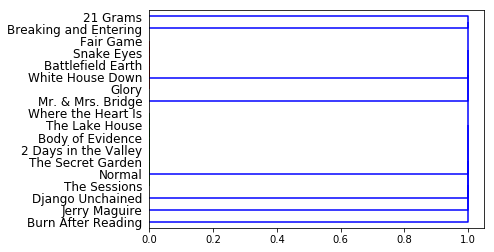

In [7]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

sample = df.sample(frac=0.1, random_state=1)
sample

names = sample['title']
Y = sample['class']
X = sample.drop(['title','class'],axis=1)
Z = hierarchy.linkage(X.as_matrix(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Complete Link (MAX)

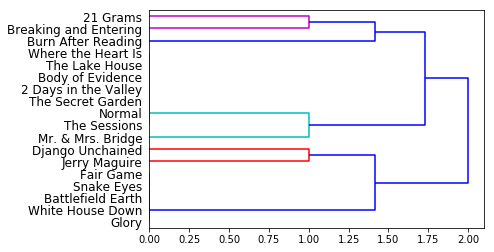

In [8]:
Z = hierarchy.linkage(X.as_matrix(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Group Average 

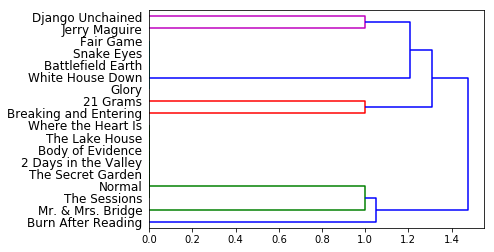

In [9]:
Z = hierarchy.linkage(X.as_matrix(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## Text Processing 

In [10]:
#This is our data set for Project 4, Part 2
corpus = [ 'Now for manners use has company believe parlors.',
'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.',
'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.',
'Principle oh explained excellent do my suspected conveying in.',
'Excellent you did therefore perfectly supposing described. ',
'Its had resolving otherwise she contented therefore.',
'Afford relied warmth out sir hearts sister use garden.',
'Men day warmth formed admire former simple.',
'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ' ,
'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy. ']

In [11]:
#Here, we are going to create a Count Vectorizer, which 
#CountVectorizer transforms text into a sparse matrix where rows are text and columns are words, 
#and values are occurrence values.

import sklearn.feature_extraction.text as sk_text
#Creates the CountVectorizer
vectorizer = sk_text.CountVectorizer(min_df=1)
#Takes our data, and fits it into a matrix
matrix = vectorizer.fit_transform(corpus)

print(type(matrix))          # Compressed Sparse Row matrix
print(vectorizer.get_feature_names())
print(matrix.toarray())        #  convert it to numpy array

<class 'scipy.sparse.csr.csr_matrix'>
['admire', 'afford', 'agreed', 'allowance', 'am', 'an', 'and', 'announcing', 'as', 'believe', 'company', 'comparison', 'contented', 'continue', 'conveying', 'day', 'declared', 'described', 'devonshire', 'did', 'direction', 'dissimilar', 'do', 'easy', 'excellent', 'excuse', 'exercise', 'explained', 'for', 'formed', 'former', 'garden', 'had', 'has', 'hastened', 'he', 'head', 'hearts', 'humanity', 'in', 'is', 'its', 'just', 'least', 'literature', 'manners', 'men', 'most', 'my', 'necessary', 'no', 'nor', 'now', 'of', 'oh', 'on', 'otherwise', 'out', 'parish', 'parlors', 'party', 'perfectly', 'principle', 'property', 'put', 'relied', 'resolving', 'result', 'room', 'say', 'set', 'she', 'simple', 'sir', 'sister', 'so', 'such', 'supplied', 'supposing', 'suspected', 'sweetness', 'terminated', 'therefore', 'to', 'travelling', 'uncommonly', 'use', 'vicinity', 'warmth', 'while', 'who', 'wrote', 'yet', 'you']
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [12]:
#TfldfVectorizer: TfIdfVectorizer transforms text into a sparse matrix where rows are text and columns
#are words, and values are the tf-dif values 

vectorizer = sk_text.TfidfVectorizer(
                             #stop_words='english',
                             #max_features = 1000,
                             min_df=3)


#max_features:  build a vocabulary that only consider the top max_features features 
#ordered by term frequency across the data.

matrix = vectorizer.fit_transform(corpus)

print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array

print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
['use']


In [13]:
#TfldfVectorizer Continued:

vectorizer = sk_text.TfidfVectorizer(#stop_words='english',
                             #max_features = 1000,
                             min_df=2, 
                             max_df=3
                             )

matrix = vectorizer.fit_transform(corpus)
print(type(matrix))               # Compressed Sparse Row matrix

tfidf_data = matrix.toarray()     #  convert it to numpy array
print(vectorizer.get_feature_names())
print(tfidf_data)

<class 'scipy.sparse.csr.csr_matrix'>
['admire', 'as', 'did', 'excellent', 'formed', 'no', 'on', 'therefore', 'use', 'warmth']
[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.        ]
 [0.         0.75262077 0.         0.         0.         0.
  0.         0.         0.65845424 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.57735027 0.57735027 0.         0.
  0.         0.57735027 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.65845424 0.75262077]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.         0.         0.         0.57735027]
 [0.         0.  

## Artifcial Neural Network (ANN)

In [14]:
from sklearn import preprocessing

data_df = pd.read_csv('Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv',header='infer')

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

#normalize
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

Using TensorFlow backend.


In [15]:
normalize_numeric_minmax(data_df, 'CGPA')
normalize_numeric_minmax(data_df, 'Chance of Admit ')
X = data_df[['CGPA']]
y = data_df[['Chance of Admit ']]
data_df = data_df.drop('Serial No.', axis=1)
#target to binary
data_df['Chance of Admit '] = np.where(data_df['Chance of Admit '] > 0.5, 1, data_df['Chance of Admit '])
data_df['Chance of Admit '] = np.where(data_df['Chance of Admit '] < 0.5, 0, data_df['Chance of Admit '])
#data_df
ChanceofAdmit = encode_text_index(data_df,'Chance of Admit ')

In [16]:
#split training data
# split the data
numInstances = 500
numTrain = 100
numTest = numInstances - numTrain

trainingData = data_df[:numTest]
testData = data_df[numTest:]
testData['Chance of Admit '] = np.where(testData['Chance of Admit '] > 0.5, 1, testData['Chance of Admit '])
testData['Chance of Admit '] = np.where(testData['Chance of Admit '] < 0.5, 0, testData['Chance of Admit '])

# train with training data
Y = pd.DataFrame(trainingData, columns=['Chance of Admit '])
X = trainingData.drop(['Chance of Admit '] ,axis=1)

In [17]:
#test the data
encode_text_index(testData,'Chance of Admit ')
testData[0:10]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
400,304,100,2,3.5,3.0,0.455128,0,0
401,315,105,2,3.0,3.0,0.493590,0,1
402,324,109,3,3.5,3.0,0.685897,1,1
403,330,116,4,4.0,3.5,0.778846,1,1
404,311,101,3,2.0,2.5,0.269231,1,0
405,302,99,3,2.5,3.0,0.208333,0,0
406,322,103,4,3.0,2.5,0.391026,1,0
407,298,100,3,2.5,4.0,0.368590,1,0
408,297,101,3,2.0,4.0,0.278846,1,0
409,300,98,1,2.0,2.5,0.391026,0,0


In [18]:
#test the data
encode_text_index(testData,'Chance of Admit ')
testData[0:10]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
400,304,100,2,3.5,3.0,0.455128,0,0
401,315,105,2,3.0,3.0,0.493590,0,1
402,324,109,3,3.5,3.0,0.685897,1,1
403,330,116,4,4.0,3.5,0.778846,1,1
404,311,101,3,2.0,2.5,0.269231,1,0
405,302,99,3,2.5,3.0,0.208333,0,0
406,322,103,4,3.0,2.5,0.391026,1,0
407,298,100,3,2.5,4.0,0.368590,1,0
408,297,101,3,2.0,4.0,0.278846,1,0
409,300,98,1,2.0,2.5,0.391026,0,0


In [19]:
X,Y = to_xy(data_df,'Chance of Admit ')
testX, testY = to_xy(testData,'Chance of Admit ')

print(X.shape)
print(Y.shape)

(500, 7)
(500, 2)


In [20]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,verbose=2, epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 0.5569
Epoch 2/100
 - 0s - loss: 0.5568
Epoch 3/100
 - 0s - loss: 0.5607
Epoch 4/100
 - 0s - loss: 0.5503
Epoch 5/100
 - 0s - loss: 0.5394
Epoch 6/100
 - 0s - loss: 0.5379
Epoch 7/100
 - 0s - loss: 0.5175
Epoch 8/100
 - 0s - loss: 0.5145
Epoch 9/100
 - 0s - loss: 0.5176
Epoch 10/100
 - 0s - loss: 0.5029
Epoch 11/100
 - 0s - loss: 0.5118
Epoch 12/100
 - 0s - loss: 0.5090
Epoch 13/100
 - 0s - loss: 0.5002
Epoch 14/100
 - 0s - loss: 0.4916
Epoch 15/100
 - 0s - loss: 0.4933
Epoch 16/100
 - 0s - loss: 0.4883
Epoch 17/100
 - 0s - loss: 0.4732
Epoch 18/100
 - 0s - loss: 0.4726
Epoch 19/100
 - 0s - loss: 0.4832
Epoch 20/100
 - 0s - loss: 0.4667
Epoch 21/100
 - 0s - loss: 0.4666
Epoch 22/100
 - 0s - loss: 0.4716
Epoch 23/100
 - 0s - loss: 0.4819
Epoch 24/100
 - 0s - loss: 0.4584
Epoch 25/100
 - 0s - loss: 0.4660
Epoch 26/100
 - 0s - loss: 0.4622
Epoch

In [21]:
pred = model.predict(testX)
print(pred[0])

pred = np.argmax(pred, axis=1)
true = np.argmax(testY, axis=1)

ChanceofAdmit[pred]

[0.6520569  0.34794313]


array([0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [22]:
ChanceofAdmit[true]

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))
print(classification_report(true,pred))

Accuracy on test data is 0.78
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        36
           1       0.80      0.88      0.84        64

   micro avg       0.78      0.78      0.78       100
   macro avg       0.77      0.74      0.75       100
weighted avg       0.78      0.78      0.77       100

